# Current Population Survey Random Forest Classification
A random forest estimator is an ensemble estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. We use the n_estimators value to set the number of trees in the forest, and max_depth to increase the maximum tree depth. For consistency, we will set n_estimators=15 for each model, and score models at increasing tree depths.

Predict whether an individuals family income is $50,000 or greater. Then predict whether an individual is married.

In [1]:
import numpy as np
import pandas as pd
import sklearn as skl
from sklearn import ensemble
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
%matplotlib inline

In [2]:
# Import dataset
data = pd.read_csv("../datasets/CPS2016_NEW.csv", index_col=None)

# We are going to use the entire dataset for this model
# to test on a smaller sample uncomment below
# data = data.sample(n=1000)

# Apply 80/20 training/testing split
# Results may vary each time the data is split
data_train, data_test = train_test_split(data, test_size=0.2)
data.head()

,age,weekly_hrs,educ,fam_income,num_in_house,num_child,sex,marital,race,state,citizen,worker_class,industry,occupation,faminc_50,ismarried
0,17,60,34,7,11,0,1,6,1,36,1,6,1,18,0,0
1,64,20,35,16,2,0,1,1,1,18,1,6,6,21,1,1
2,55,40,36,2,2,0,1,1,1,23,1,6,47,20,0,1
3,58,18,36,9,2,0,1,4,1,37,1,6,22,14,0,0
4,17,15,36,15,5,0,1,6,1,27,1,6,1,18,1,0


In [3]:
# Function to plot binary categories
def getColor(arr):
    colorList = [];
    for x in arr:
        color = "magenta" if x == 1 else "green"
        colorList.append(color)
    return colorList;        

# Function to display scores at each increasing tree depth
# at a given depth
# Using 5-fold cross validation
def getRandomForestCVScores(X, Y):
    nb = np.arange(1,15)
    scorelist = []
    for d in nb:
        T = ensemble.RandomForestClassifier(max_depth=d, n_estimators=15)
        scores = cross_val_score(T, X, Y,
                                 cv=KFold(shuffle=True, n_splits=5), n_jobs=-1)
        scorelist.append(scores.mean())
        print(f"{d}:\t{scores.mean()}")
    
    print("max score: ", max(scorelist))
    print("tree-depth = ", scorelist.index(max(scorelist)) + 1)
    
# Function to display scores at each increasing estimator
# at a given depth
# using split data, returns graph
def getRandomForestScores(X, Y, xTest, yTest):
    depth = np.arange(1,15)
    score_train = []
    score_test = []
    print("Training", "   ", "Testing")
    for d in depth:
        T = ensemble.RandomForestClassifier(max_depth=d, n_estimators=15)
        T.fit(X,Y)
        s_train = T.score(X, Y)
        s_test = T.score(xTest, yTest)
        print(f"{d}:\t{s_train}:\t{s_test}")
        score_train.append(s_train)
        score_test.append(s_test)
    
    fig,ax = plt.subplots(1, figsize=(6,6), dpi=100)
    ax.plot(depth, score_train, label="training data")
    ax.plot(depth, score_test, label="testing data")
    ax.set_xlabel("tree depth")
    ax.set_ylabel("R2 score")
    fig.legend()
    plt.show()     
    
# function to plot Random Forest prediction with 2 input variables
def plotRandomForestTwoVars(x, y, target, depth):
    colorList = getColor(data_train[target])
    T2 = ensemble.RandomForestClassifier(max_depth=depth, n_estimators=15)
    T2.fit(data_train[[x,y]],data_train[target])

    x_min, x_max = 10, 90
    y_min, y_max = 30, 47
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    test = pd.DataFrame({'x1': xx.ravel(), 'x2': yy.ravel()})

    # Evaluate model
    colorPredict = getColor(T2.predict(test[['x1','x2']])) 

    fig,ax = plt.subplots(figsize=(10,10), dpi=100)
    ax.scatter(test['x1'], test['x2'], color=colorPredict, alpha=0.05)
    ax.scatter(data_train[x], data_train[y],  color=colorList, s=20, alpha=.2)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title("tree depth= " + str(depth))
    plt.show(fig)          

# Predict if Family Income >50,000
First, lets try using Random Forest Classification with only two input variables, 'age' and 'education' to predict if the family income is less than $50,000.

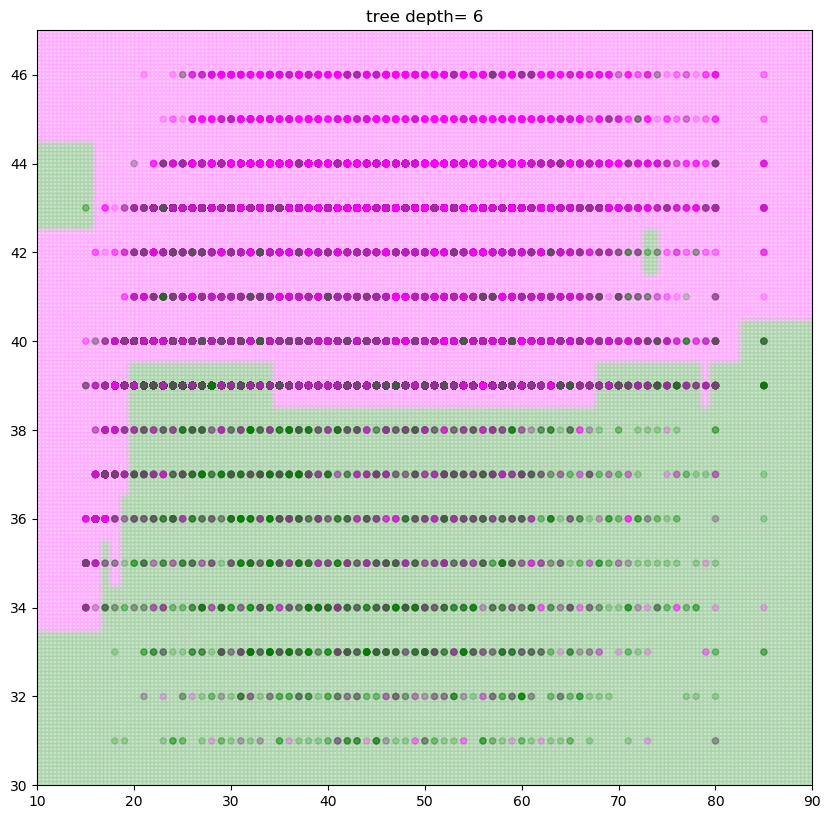

In [4]:
# Depth of 6
plotRandomForestTwoVars('age', 'educ', 'faminc_50', 6)    

# Score the model

We are going to score the model on a range of 1-14 tree depths, first with split data then using using cross-validation.

Training     Testing
1:	0.6671643817021854:	0.6596688082526468
2:	0.6671643817021854:	0.6596688082526468
3:	0.682208949821275:	0.6772237806533346
4:	0.6989955205646803:	0.6927879829879648
5:	0.7002171847427718:	0.6925165143425934
6:	0.7010994977602824:	0.6914306397611076
7:	0.7013257318673363:	0.6914306397611076
8:	0.7020044341884982:	0.690525744276536
9:	0.702728383331071:	0.6876300787259072
10:	0.7034749558843492:	0.68753958917745
11:	0.704266775259038:	0.6868156727897928
12:	0.7048097371159676:	0.6846439236268211
13:	0.7049681009909053:	0.6849153922721926
14:	0.7049454775802:	0.6841914758845353


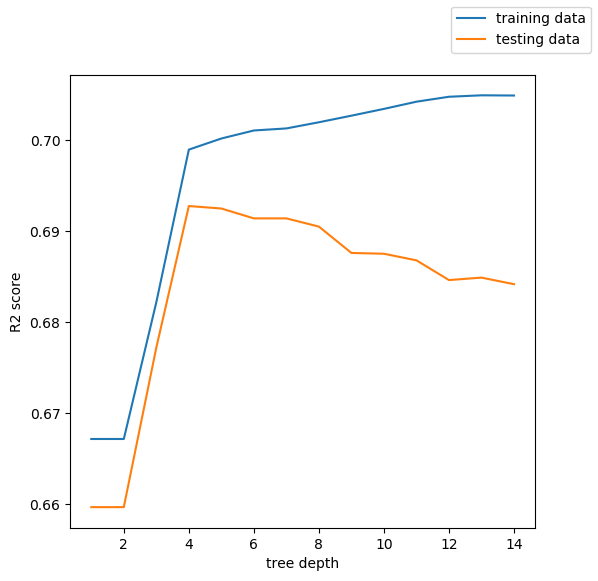

In [5]:
# Score using two input variables
getRandomForestScores(data_train[['age','educ']], data_train['faminc_50'],
                  data_test[['age','educ']], data_test['faminc_50'])

In [6]:
# Score using two input variables with cross validation
getRandomForestCVScores(data[['age','educ']], data['faminc_50'])

1:	0.6656652615536933
2:	0.6673483212960396
3:	0.6819176201166864
4:	0.6963603727841832
5:	0.6969396532980985
6:	0.697645447208766
7:	0.6968670389158287
8:	0.6951838268562335
9:	0.6950390321139628
10:	0.6939896514350783
11:	0.6929217224460349
12:	0.6926863333348348
13:	0.6917270704192943
14:	0.6917452502199797
max score:  0.697645447208766
tree-depth =  6


The model score peaked at around .698 where the tree depth = 6. This score is very close to the regular Decision Tree Classifier.

We are going to add the rest of the numerical variables as an input (besides fam_income, because this is a numerical representation of family income) to predict if the family income is over $50,000.

Training     Testing
1:	0.6671643817021854:	0.6596688082526468
2:	0.695285281208995:	0.6893493801465931
3:	0.7003755486177096:	0.690525744276536
4:	0.7160988190579611:	0.7051850511265949
5:	0.7229310890909914:	0.717129671522939
6:	0.7320257001945614:	0.7231019817211112
7:	0.7403511153341478:	0.7286218441769976
8:	0.7432242884937333:	0.7269930323047687
9:	0.7478168408669291:	0.7262691159171115
10:	0.7556671643817022:	0.7293457605646548
11:	0.7614813809329894:	0.7287123337254547
12:	0.7714130582326592:	0.7285313546285404
13:	0.7808243970861047:	0.7252737308840829
14:	0.7913669064748201:	0.7218351280427111


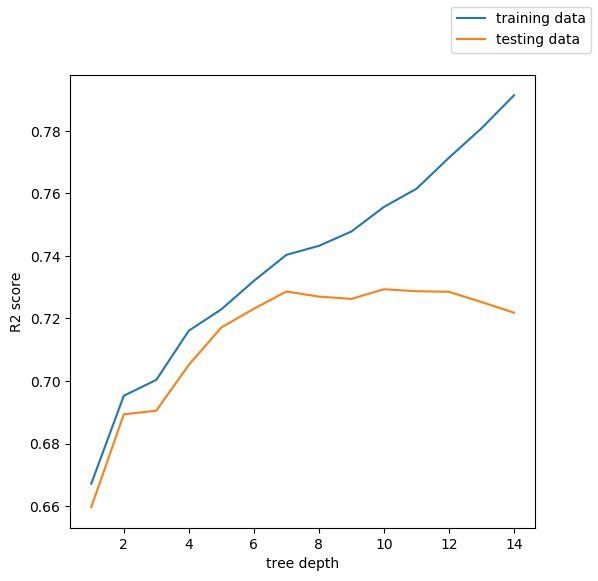

In [7]:
# Score with all numerical variables
getRandomForestScores(data_train[['age','num_in_house', 'num_child', 
                'educ','weekly_hrs']], data_train['faminc_50'],
                  data_test[['age','num_in_house', 'num_child', 
                'educ','weekly_hrs']], data_test['faminc_50'])

In [8]:
# Score with all numerical variables w/ cross validation
getRandomForestCVScores(data[['age','num_in_house', 'num_child', 
                'educ','weekly_hrs']], data['faminc_50'])

1:	0.6656653188773891
2:	0.6934826708420155
3:	0.6984961390443567
4:	0.7078529106720752
5:	0.7214086430211881
6:	0.7277071070327576
7:	0.7327022725979222
8:	0.734765478523882
9:	0.735036955358353
10:	0.7350369569961729
11:	0.7352722511138199
12:	0.7343853732857657
13:	0.7335347862706473
14:	0.7311095812053617
max score:  0.7352722511138199
tree-depth =  11


Using the numerical variables 'age','num_in_house', 'num_child', 'educ' and 'weekly_hrs', the score for "family income greater than $50,000" peaked at .7375 where the tree depth = 6. This score is greater than knearest neighbors score and regular decision tree classification score.

# Predict if Individual is Married

Lets use all of the numerical variables to predict whether an individual is married

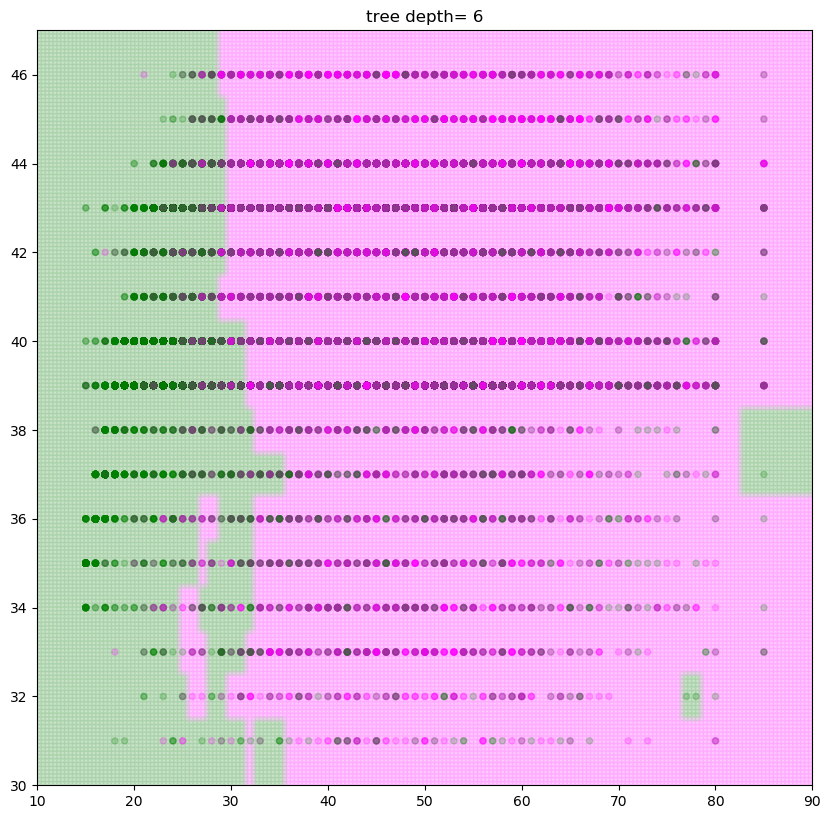

In [9]:
# Depth of 6
plotRandomForestTwoVars('age', 'educ', 'ismarried', 6)    

# Score the model

We are going to score the model on a range of 1-14 tree depths using cross-validation.

Training     Testing
1:	0.6923668612279987:	0.689892317437336
2:	0.6925252251029366:	0.6893493801465931
3:	0.6957151260123976:	0.6904352547280789
4:	0.6955341387267544:	0.691068681567279
5:	0.6972987647617754:	0.691068681567279
6:	0.6977512329758835:	0.691068681567279
7:	0.6987692864576264:	0.6892588905981359
8:	0.6992443780824397:	0.6901637860827075
9:	0.7000814442785395:	0.6882635055651072
10:	0.700511289081942:	0.68753958917745
11:	0.7008280168318176:	0.6864537145959642
12:	0.7016198362065065:	0.6852773504660212
13:	0.7015972127958011:	0.6847344131752783
14:	0.7019818107777929:	0.6841009863360782


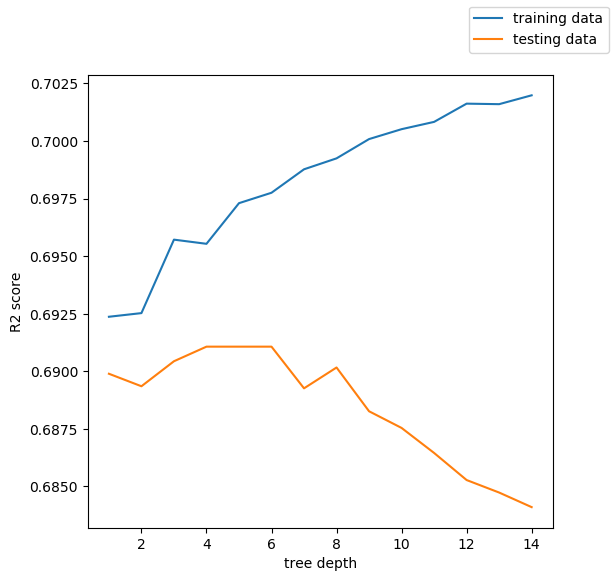

In [10]:
# Score using two input variables
getRandomForestScores(data_train[['age','educ']], data_train['ismarried'],
                  data_test[['age','educ']], data_test['ismarried'])

In [11]:
# Score using 2 input variables with cross validation
getRandomForestCVScores(data[['age','educ']], data['ismarried']) 

1:	0.6888494978648971
2:	0.6908946468266626
3:	0.6907318393413344
4:	0.6947858562788486
5:	0.6930483750574772
6:	0.6951295658835568
7:	0.6946046364224119
8:	0.6942067821302386
9:	0.6931929814504615
10:	0.6929939666810112
11:	0.6923062788691345
12:	0.6907498979433486
13:	0.6914013997627617
14:	0.689048543752925
max score:  0.6951295658835568
tree-depth =  6


We are going to add the rest of the numerical variables as an input to predict whether the individual is married.

Training     Testing
1:	0.7234740509479209:	0.7240068772056828
2:	0.7922265960816253:	0.7877115193195185
3:	0.7898963847789693:	0.7852683015111754
4:	0.8114112483598027:	0.7997466292643199
5:	0.8187864802497624:	0.813953488372093
6:	0.8291027555314239:	0.826350556510723
7:	0.8329939821727523:	0.8249932132838658
8:	0.8375639111352428:	0.827526920640666
9:	0.8432423872222976:	0.8311465025789522
10:	0.8474729650242071:	0.8302416070943806
11:	0.8525406090222162:	0.8304225861912949
12:	0.8594633726980679:	0.8336802099357524
13:	0.8683543731052894:	0.831689439869695
14:	0.8779014524229672:	0.8312369921274093


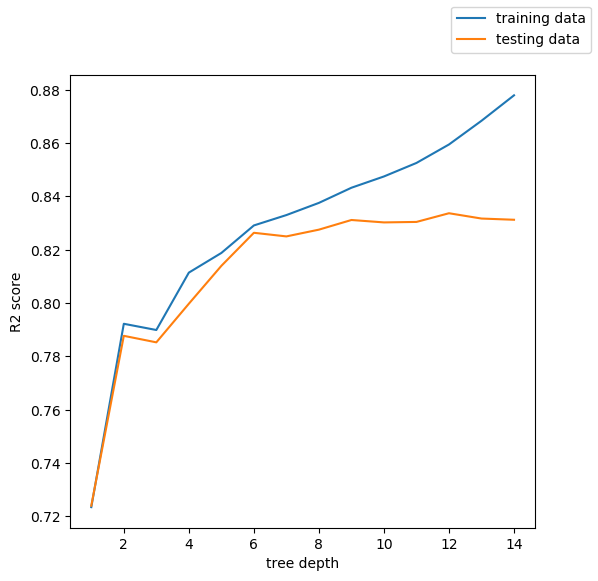

In [12]:
# Score with all numerical variables
getRandomForestScores(data_train[['age','num_in_house', 'num_child', 
                'educ','weekly_hrs','fam_income']], data_train['ismarried'],
                  data_test[['age','num_in_house', 'num_child', 
                'educ','weekly_hrs','fam_income']], data_test['ismarried'])

In [13]:
# Score with all numerical variables using Cross Validation
getRandomForestCVScores(data[['age','num_in_house', 'num_child', 
                'educ','weekly_hrs', 'fam_income']], data['ismarried'])


1:	0.7789076740460006
2:	0.7898212327788359
3:	0.7933145600959107
4:	0.8069784638969221
5:	0.8163900238753193
6:	0.8235932212272921
7:	0.8273035613164959
8:	0.8326244958073857
9:	0.8350495076099254
10:	0.836551856857818
11:	0.836334596774887
12:	0.8366241535030305
13:	0.8359545210175284
14:	0.8355925660993396
max score:  0.8366241535030305
tree-depth =  12


Using the numerical variables 'age', 'num_in_house', 'num_child', 'fam_income', 'educ' and 'weekly_hrs', the score for "Is this individual married" peaked at .8358 where the tree depth = 13. This score is greater than knearest neighbors score and very close to the Decision Tree score with the same depth.

# Conclusion

Random forest classification, which is an  ensemble estimator that fits a number of decision tree classifiers, proves to be more effective than knearest neighbors classification and regular decision tree classification. Using supervised classification methods on the CPS dataset, predicting if an individual is married is more accurate than predicting if an individuals income status.

The scores from the model predicting if an individual is married were larger than the scores for predicting the income variable. Both of the highest scores were achieved using random forest classification.
- .7375 was the highest score achieved predicting if an individuals income is over 50,000.
- .8358 is the highest score achieved predicting if an individual is married

Not Bad!